<a href="https://colab.research.google.com/github/sumanthgubbala/Dog-vs-cat-classification/blob/master/Dog_vs_Cat_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog vs Cat Classification using Transfer Learning

Examples of pre trained Models:
* VGG-16
* ResNet50
* InceptionV3
* MobileNet V2


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat Dataset from kaggle


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:06<00:00, 186MB/s]
100% 812M/812M [00:06<00:00, 127MB/s]


In [ ]:
ls

dogs-vs-cats.zip  kaggle.json  sample_data/


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset= '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("extracted")

extracted


In [ ]:
from zipfile import ZipFile
dataset= '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("extracted")

extracted


In [ ]:
import os
#counting the number of files in train floders

path,dirs, files = next(os.walk('/content/train'))

file_count = len(files)
print("NUmber of images :",file_count)

NUmber of images : 25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.1582.jpg', 'cat.6212.jpg', 'cat.8523.jpg', 'cat.11926.jpg', 'dog.9770.jpg', 'dog.8468.jpg', 'cat.11943.jpg', 'dog.7527.jpg', 'dog.7974.jpg', 'cat.7851.jpg', 'cat.910.jpg', 'cat.9853.jpg', 'cat.6682.jpg', 'dog.1088.jpg', 'dog.7210.jpg', 'cat.8358.jpg', 'cat.3757.jpg', 'cat.8385.jpg', 'cat.3922.jpg', 'dog.9384.jpg', 'dog.9389.jpg', 'dog.12146.jpg', 'dog.12401.jpg', 'dog.9665.jpg', 'cat.4943.jpg', 'dog.5241.jpg', 'cat.6529.jpg', 'dog.10399.jpg', 'dog.9774.jpg', 'cat.6064.jpg', 'dog.10092.jpg', 'dog.4119.jpg', 'cat.2487.jpg', 'cat.4379.jpg', 'dog.7130.jpg', 'dog.4332.jpg', 'cat.12246.jpg', 'dog.9887.jpg', 'dog.1935.jpg', 'cat.7303.jpg', 'cat.5495.jpg', 'cat.9496.jpg', 'dog.10502.jpg', 'cat.11931.jpg', 'dog.6963.jpg', 'cat.10339.jpg', 'dog.1876.jpg', 'cat.11919.jpg', 'cat.6452.jpg', 'dog.11894.jpg', 'cat.8375.jpg', 'cat.11179.jpg', 'dog.2121.jpg', 'dog.3654.jpg', 'cat.9945.jpg', 'dog.632.jpg', 'cat.7642.jpg', 'cat.3039.jpg', 'dog.11648.jpg', 'dog.9059.jpg', 'dog.4490.jpg', 'dog.6911.j

#Importing dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the images of dog and cats

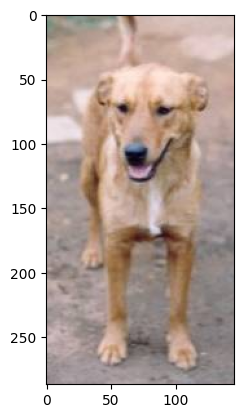

In [ ]:
#displaying the dog image

img = mpimg.imread('/content/train/dog.1582.jpg')
plt.imshow(img)

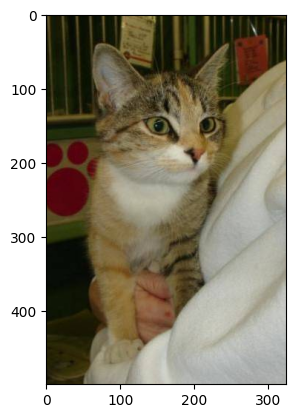

In [ ]:
#displaying the cat image

img = mpimg.imread('/content/train/cat.8523.jpg')
plt.imshow(img)

In [ ]:
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])


dog
cat
cat
cat
dog


In [ ]:
dog_count =0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]

  if name =='dog':
    dog_count +=1
  else:
    cat_count += 1

print("dog count", dog_count)
print("cat count", cat_count)

dog count 12500
cat count 12500


Resizing all images

In [ ]:
# creating a directory for resized images

os.mkdir('/content/image_resized')

In [ ]:
original_folder = '/content/train/'
resized_folder ='/content/image_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img  = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newimg_path = resized_folder+filename
  img.save(newimg_path)



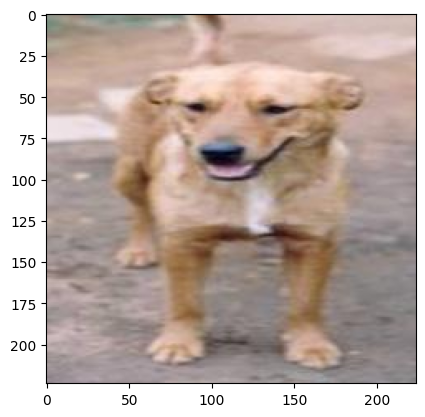

In [ ]:
#displaying the dog image

img = mpimg.imread('/content/image_resized/dog.1582.jpg')
plt.imshow(img)

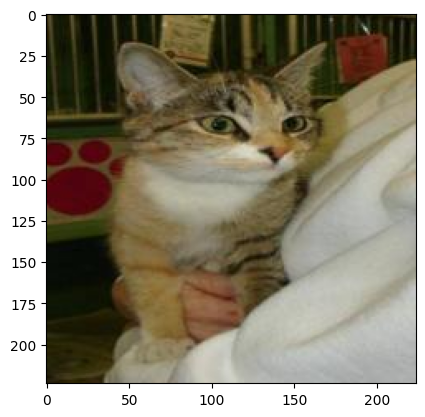

In [ ]:
#displaying the cat image

img = mpimg.imread('/content/image_resized/cat.8523.jpg')
plt.imshow(img)

# Creating labels for resized images of dogs and cats

cat --> 0

dog --> 1

In [ ]:
# creating for loop to assign labels

labels=[]
file_names = os.listdir('/content/image_resized/')

for i in range(2000):

  filename = file_names[i]
  label = filename[0:3]

  if label == 'dog':
    labels.append(1)
  else :
    labels.append(0)



In [ ]:
print(file_names[0:5])
print(len(file_names))

['dog.1582.jpg', 'cat.6212.jpg', 'cat.8523.jpg', 'cat.11926.jpg', 'dog.9770.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 995 1005]


#Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
imgage_directory ='/content/image_resized/'
image_extension =['png','jpg']

files = []
[files.extend(glob.glob(imgage_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images)

[[[[134 141 138]
   [134 141 138]
   [131 140 137]
   ...
   [182 189 209]
   [182 189 209]
   [182 189 209]]

  [[138 145 140]
   [138 145 140]
   [135 145 139]
   ...
   [183 190 210]
   [183 190 210]
   [183 190 210]]

  [[141 150 140]
   [141 150 140]
   [139 150 142]
   ...
   [184 191 211]
   [184 191 211]
   [184 191 211]]

  ...

  [[147 141 152]
   [145 139 150]
   [142 136 147]
   ...
   [132 131 133]
   [128 127 129]
   [126 125 127]]

  [[157 149 160]
   [153 145 156]
   [148 140 151]
   ...
   [131 130 132]
   [129 128 130]
   [128 127 129]]

  [[145 137 148]
   [143 135 146]
   [140 132 143]
   ...
   [136 135 137]
   [136 135 137]
   [137 136 138]]]


 [[[ 50  47  42]
   [ 50  47  42]
   [ 49  46  41]
   ...
   [ 46  53  72]
   [ 44  50  73]
   [ 42  50  73]]

  [[ 49  46  41]
   [ 49  46  41]
   [ 49  46  41]
   ...
   [ 46  53  72]
   [ 42  51  71]
   [ 41  49  72]]

  [[ 50  47  43]
   [ 50  47  43]
   [ 50  47  43]
   ...
   [ 45  52  71]
   [ 41  50  70]
   [ 39  50

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train,X_test ,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
X.shape,X_train.shape, X_test.shape


((2000, 224, 224, 3), (1600, 224, 224, 3), (400, 224, 224, 3))

1600 --> Training image

400 --> Testing Images

In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.23921569, 0.22352941, 0.27058824],
         [0.22745098, 0.21176471, 0.25882353],
         [0.23137255, 0.19607843, 0.24705882],
         ...,
         [0.31764706, 0.32156863, 0.40392157],
         [0.31764706, 0.32156863, 0.40392157],
         [0.31764706, 0.32156863, 0.40392157]],

        [[0.24313725, 0.22745098, 0.2745098 ],
         [0.23921569, 0.22352941, 0.27058824],
         [0.23921569, 0.21176471, 0.2627451 ],
         ...,
         [0.31372549, 0.31764706, 0.4       ],
         [0.31764706, 0.32156863, 0.40392157],
         [0.31764706, 0.32156863, 0.40392157]],

        [[0.25098039, 0.24313725, 0.29019608],
         [0.25882353, 0.24313725, 0.29019608],
         [0.25882353, 0.24313725, 0.29019608],
         ...,
         [0.31372549, 0.3254902 , 0.40784314],
         [0.31764706, 0.32941176, 0.41176471],
         [0.32156863, 0.33333333, 0.41568627]],

        ...,

        [[0.53333333, 0.54117647, 0.58039216],
         [0.53333333, 0.54117647, 0.58039216]

# **Buliding the Neural Network**

In [ ]:
!pip install tf_keras -q

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

import tf_keras as keras #this was really important in creating the sequential model below otherwise it kept giving
#errors when tf from tensorflow was used to create keras **layers**

In [ ]:
num_of_classes = 2

model = keras.Sequential([

    pretrained_model,
    keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled,y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.1694 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 74s 1s/step - loss: 0.0637 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 98s 2s/step - loss: 0.0466 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 107s 2s/step - loss: 0.0381 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 104s 2s/step - loss: 0.0329 - acc: 0.9925


In [ ]:
score, acc = model.evaluate(X_test_scaled,y_test)
print('Test Loss',score)
print('Test Accuracy ',acc)

13/13 [==============================] - 28s 2s/step - loss: 0.0521 - acc: 0.9775
Test Loss 0.05214705318212509
Test Accuracy  0.9775000214576721


#Predictive System

path of the image to be predicted :/content/cat.jpg


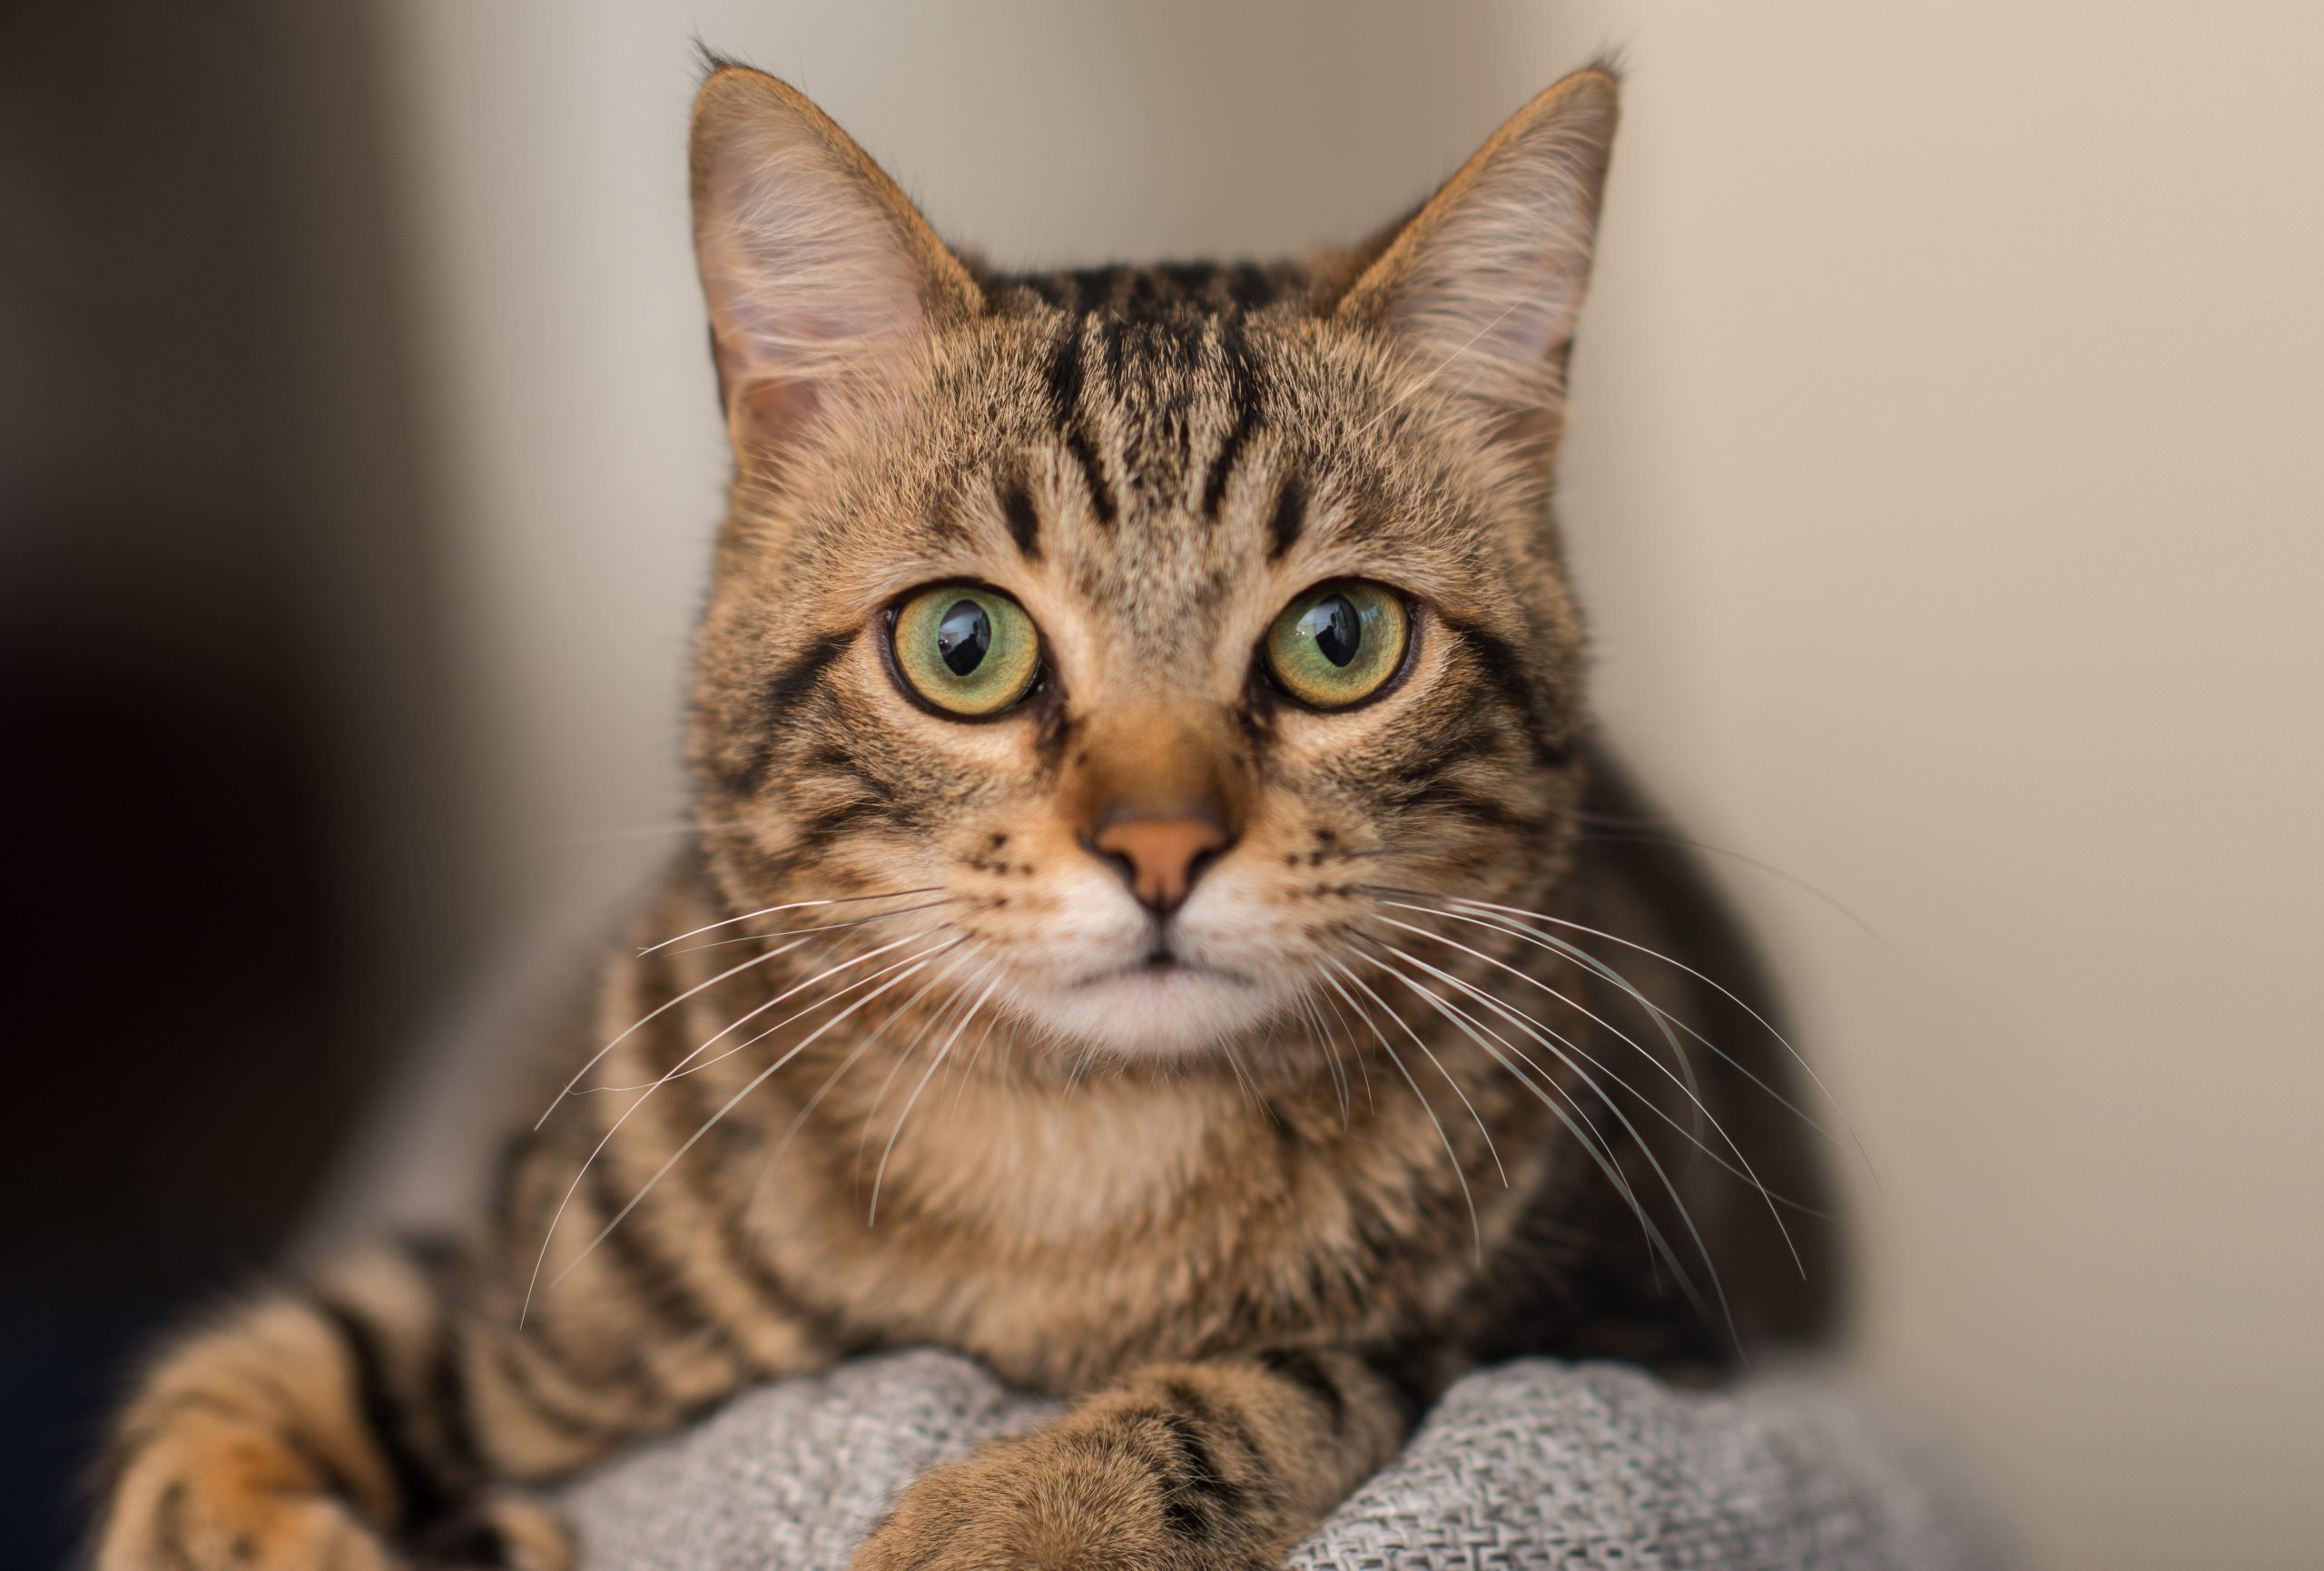

1/1 [==============================] - 0s 232ms/step
[[ 4.5459504 -4.445575 ]]
The image represented as cat


In [ ]:
input_image_path =input('path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0 :
  print('The image represented as cat')
else :
  print('The image represented as dog')

In [ ]:
# Save the model in HDF5 format
model.save('dog_vs_cat_classification.h5')

# The model is saved as a single file 'my_model.h5'


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
